# Layered hybrid ML analytic workflow_2_RF and HMM classification

## 2. Random Forest classification

In the second step, the predefined behavioral features were fed to the Random Forest classifiers.

## 2.1 Applying a rolling median filter to behaivoral features. 

In [7]:
import glob
import pandas as pd
import os

# load data
data = pd.read_csv(r"C:\Users\.csv", index_col=0)


In [ ]:
# rolling median filter (window=5)

data['angle_1_mf_5'] = data['angle_1'].rolling(window=5,center=True,axis=0).median().bfill().ffill()
data['distance_mf_5'] = data['distance'].rolling(window=5,center=True,axis=0).median().bfill().ffill()
data['angle_2_mf_5'] = data['angle_2'].rolling(window=5,center=True,axis=0).median().bfill().ffill()
data['velocity_body_center_mf_5'] = data['velocity_body_center'].rolling(window=5,center=True,axis=0).median().bfill().ffill()
data['velocity_snout_mf_5'] = data['velocity_snout'].rolling(window=5,center=True,axis=0).median().bfill().ffill()

# rolling median filter (window=10)
data['angle_1_mf_10'] = data['angle_1'].rolling(window=10,center=True,axis=0).median().bfill().ffill()
data['distance_mf_10'] = data['distance'].rolling(window=10,center=True,axis=0).median().bfill().ffill()
data['angle_2_mf_10'] = data['angle_2'].rolling(window=10,center=True,axis=0).median().bfill().ffill()
data['velocity_body_center_mf_10'] = data['velocity_body_center'].rolling(window=10,center=True,axis=0).median().bfill().ffill()
data['velocity_snout_mf_10'] = data['velocity_snout'].rolling(window=10,center=True,axis=0).median().bfill().ffill()

# rolling median filter (window=15)
data['angle_1_mf_15'] = data['angle_1'].rolling(window=15,center=True,axis=0).median().bfill().ffill()
data['distance_mf_15'] = data['distance'].rolling(window=15,center=True,axis=0).median().bfill().ffill()
data['angle_2_mf_15'] = data['angle_2'].rolling(window=15,center=True,axis=0).median().bfill().ffill()
data['velocity_body_center_mf_15'] = data['velocity_body_center'].rolling(window=15,center=True,axis=0).median().bfill().ffill()
data['velocity_snout_mf_15'] = data['velocity_snout'].rolling(window=15,center=True,axis=0).median().bfill().ffill()

# rolling median filter (window=30)
data['angle_1_mf_30'] = data['angle_1'].rolling(window=30,center=True,axis=0).median().bfill().ffill()
data['distance_mf_30'] = data['distance'].rolling(window=30,center=True,axis=0).median().bfill().ffill()
data['angle_2_mf_30'] = data['angle_2'].rolling(window=30,center=True,axis=0).median().bfill().ffill()
data['velocity_body_center_mf_30'] = data['velocity_body_center'].rolling(window=30,center=True,axis=0).median().bfill().ffill()
data['velocity_snout_mf_30'] = data['velocity_snout'].rolling(window=30,center=True,axis=0).median().bfill().ffill()

# rolling median filter (window=60)
data['angle_1_mf_60'] = data['angle_1'].rolling(window=60,center=True,axis=0).median().bfill().ffill()
data['distance_mf_60'] = data['distance'].rolling(window=60,center=True,axis=0).median().bfill().ffill()
data['angle_2_mf_60'] = data['angle_2'].rolling(window=60,center=True,axis=0).median().bfill().ffill()
data['velocity_body_center_mf_60'] = data['velocity_body_center'].rolling(window=60,center=True,axis=0).median().bfill().ffill()
data['velocity_snout_mf_60'] = data['velocity_snout'].rolling(window=60,center=True,axis=0).median().bfill().ffill()


data.to_csv(r"C:\Users\.csv")


## 2.2 Random Forest classification

In [3]:
# import the libraries used for machine learning
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model

In [25]:
# loading RF
Ran = RandomForestClassifier(n_estimators=50)
# load the model from disk
filename = '.sav'  # load .sav file
Ran = pickle.load(open(filename, 'rb'))

In [26]:
# load the model from disk
filename = '14_5features_median.sav'  
Ran = pickle.load(open(filename, 'rb'))
# load data (smoothed behavioral feature data)
data_RF = pd.read_csv(r"C:\Users\.csv", index_col=0) 
#data_RF_2 = data_RF[['distance', 'angle_2','velocity_snout', 'velocity_body_center','angle_1']] # for first RF
data_RF_2 = data_RF[['angle_1_mf_5', 'distance_mf_5, 'angle_2_mf_5', 'velocity_body_center_mf_5', 'velocity_snout_mf_5', 
                     'angle_1_mf_10','distance_mf_10, 'angle_2_mf_10', 'velocity_body_center_mf_10', 'velocity_snout_mf_10', 
                     'angle_1_mf_15', 'distance_mf_15, 'angle_2_mf_15', 'velocity_body_center_mf_15','velocity_snout_mf_15',
                     'angle_1_mf_30', 'distance_mf_30, 'angle_2_mf_30', 'velocity_body_center_mf_30', 'velocity_snout_mf_30', 
                     'angle_1_mf_60', 'distance_mf_60, 'angle_2_mf_60', 'velocity_body_center_mf_60', 'velocity_snout_mf_60']] # for RF using smoothed data
                     

In [30]:
# RF classification
y_pred = Ran.predict(data_RF_2)
# save RF predictions 
data_RF['RF_behavior'] = y_pred
data_RF.to_csv(r"C:\Users\.csv")

In [43]:
# The following code is for batch processing of RF classification. 

files = glob.glob(r'C:\Users\\*.csv')
for file_name in files:
    df = pd.read_csv(file_name, index_col=0)
    data_RF_2 = df[['distance', 'angle_2','velocity_snout', 'velocity_body_center','angle_1']]
    y_pred = Ran.predict(data_RF_2)
    df['RF_behavior'] = y_pred
    os.path.splitext(file_name)
    newfilename = os.path.splitext(file_name)[0]    
    df.to_csv(newfilename + '_RF.csv')

## 2.3 HMM clasification

In the third step, the predefined behavioral features that used for RF classification were fed to the Hidden Markov Models (HMM)  classifiers.


In [13]:
import numpy as np
from hmmlearn import hmm
from scipy.linalg import block_diag
from ssm.util import find_permutation
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssm
import pandas as pd
from ssm.plots import gradient_cmap, white_to_color_cmap
from hmmlearn.hmm import GaussianHMM
import os
import collections
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import MonthLocator

%matplotlib inline

In [36]:
# HMM source: https://hmmlearn.readthedocs.io/en/latest/
model_hmm = hmm.GaussianHMM(n_components=6, covariance_type="diag", n_iter=100, verbose=True, random_state=0)


In [48]:
import pickle 
#load the model to disk
filename = '.sav' # load .sav file

# Load the pickled model 
model_hmm = pickle.load(open(filename, 'rb'))

In [ ]:
# load data (behavioral feature data) 
data_csv = pd.read_csv(r"C:\Users\.csv", index_col=0)
feature_dict = data_csv[['angle_2','distance','angle_1','velocity_snout','velocity_body_center']].copy()


In [51]:
# HMM classification
model_hmm = model_hmm.fit(feature_dict)
a_hidden_states = model_hmm.predict(feature_dict)

# save HMM predictions 
data_csv['hmm_6'] = a_hidden_states
data_csv.to_csv(r"C:\Users\.csv")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
         1   -19574481.3031             +nan
         2   -17878672.2087    +1695809.0944
         3   -16649686.1874    +1228986.0213
         4   -16523812.7883     +125873.3991
         5   -16500045.9261      +23766.8621
         6   -16485268.2542      +14777.6719
         7   -16475615.0406       +9653.2136
         8   -16469047.6903       +6567.3503
         9   -16464988.8563       +4058.8340
        10   -16462321.8196       +2667.0367
        11   -16460541.1419       +1780.6777
     

,frame_num,center_x,center_y,radii,snout_x,snout_y,tail_x,tail_y,v_x,v_y,...,angle_2_mf_30,velocity_body_center_mf_30,velocity_snout_mf_30,angle_1_mf_60,distance_mf_60,angle_2_mf_60,velocity_body_center_mf_60,velocity_snout_mf_60,RF_behavior,hmm_6
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,3,1059.313888,403.945605,60.550178,335.979287,498.585724,249.939397,670.089880,8.376557,-54.372026,...,75.633157,1.132474,1.897420,275.833764,421.864213,75.633157,0.581622,1.479111,HD,5
1,4,1059.313888,403.945605,60.550178,335.979287,498.585724,249.939397,670.089880,8.376557,-54.372026,...,76.109048,0.753949,1.897420,275.600412,729.499620,76.109048,0.581622,1.479111,HD,5
2,5,1059.313888,403.945605,60.550178,335.979287,498.585724,249.939397,670.089880,8.376557,-54.372026,...,76.198501,0.348813,1.683265,275.560599,729.499620,76.198501,0.539047,1.289902,HD,5
3,6,1059.368480,403.960844,60.537251,334.114870,496.219944,250.858504,668.130704,7.549381,-54.020722,...,76.324576,0.241191,1.585165,275.436932,730.298897,76.324576,0.425238,1.085111,HD,5
4,7,1059.421471,403.896944,60.555052,332.795525,493.131719,252.465556,668.077404,6.530590,-53.993462,...,76.462986,0.241191,1.479111,275.314114,731.425755,76.462986,0.326771,0.985714,HD,5


<AxesSubplot:>

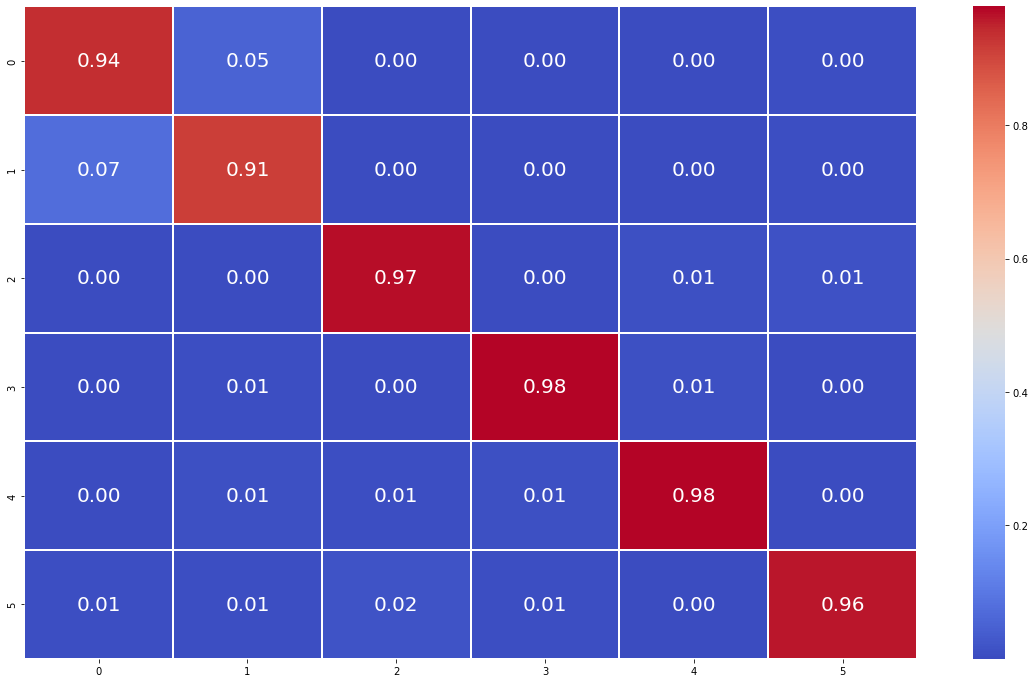

In [80]:
# HMM state transition probability matrix  
print (model_hmm.transmat_)

# HMM state transition probability matrix plot
trasition_probility = model_hmm.transmat_
plt.figure(figsize = (20,12))
sns.heatmap(trasition_probility, annot=True, cmap="coolwarm", fmt=".2f",linewidths=.2, annot_kws={'size':20})

In [ ]:
# HMM start probability
print (model_hmm.startprob_)

## 2.4 Compressing RF and HMM outputs

In this step, the behavioral feature sequences and the predications of RF and HMM were compressed by replacing with the most frequent element/median in every 15 frames.

In [14]:
import numpy as np
from hmmlearn import hmm
from scipy.linalg import block_diag
from ssm.util import find_permutation
import autograd.numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssm
import pandas as pd
from ssm.plots import gradient_cmap, white_to_color_cmap
import numpy as np

%matplotlib inline



## Define several essential functions

In [62]:
# most frequent element

def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

In [63]:
# Source: https://stackoverflow.com/questions/24483182/python-split-list-into-n-chunks/29679492
# chunk list
def chuncker(list_to_split, chunk_size):
    list_of_chunks = []
    start_chunk = 0
    end_chunk = start_chunk+chunk_size
    while end_chunk <= len(list_to_split)+chunk_size:
        chunk_ls = list_to_split[start_chunk: end_chunk]
        list_of_chunks.append(chunk_ls)
        start_chunk = start_chunk +chunk_size
        end_chunk = end_chunk+chunk_size    
    return list_of_chunks

In [69]:
# batch process

import glob
import pandas as pd
import os
import statistics

files = glob.glob(r"C:\Users\*.csv")

for file_name in files:
    # chunk_size
    n = 15 
    df = pd.read_csv(file_name) 
    
    # Compress RF_behavior and create new dataframe "merged_states_all"
    RF_merged = df[['RF_behavior_new']] # RF_behavior
    list_of_chunks_RF = chuncker(list_to_split = RF_merged, chunk_size = n)
    RF_merged_col = []
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = most_frequent(y)
        RF_merged_col.append(z)
    RF_behavior_merged = {'RF_behavior_merged':RF_merged_col}
    merged_states_all = pd.DataFrame(data=RF_behavior_merged)
    
    # Compress GT_states
    GT_state_merged = df[['GT_state']]
    list_of_chunks_GT_state = chuncker(list_to_split = GT_state_merged, chunk_size = n)
    GT_state_merged_col = []
    for i in range(0, len(list_of_chunks_GT_state)):
        x =list_of_chunks_GT_state[i][list_of_chunks_GT_state[0].columns[0]]
        y = x.tolist()
        z = most_frequent(y)
        GT_state_merged_col.append(z)
    merged_states_all['GT_state_merged']= GT_state_merged_col
    
    # Compress HMM (6)
    HMM_merged = df[['hidden_states_6']]
    list_of_chunks_HMM = chuncker(list_to_split = HMM_merged, chunk_size = n)
    HMM_merged_col = []
    for i in range(0, len(list_of_chunks_HMM)):
        x =list_of_chunks_HMM[i][list_of_chunks_HMM[0].columns[0]]
        y = x.tolist()
        z = most_frequent(y)
        HMM_merged_col.append(z)
    merged_states_all['hmm_6_merged']= HMM_merged_col
    
     # Compress HMM(11)
    HMM_merged = df[['hmm_11']]
    list_of_chunks_HMM = chuncker(list_to_split = HMM_merged, chunk_size = n)
    HMM_merged_col = []
    for i in range(0, len(list_of_chunks_HMM)):
        x =list_of_chunks_HMM[i][list_of_chunks_HMM[0].columns[0]]
        y = x.tolist()
        z = most_frequent(y)
        HMM_merged_col.append(z)
    merged_states_all['hmm_11_merged']= HMM_merged_col
    
    # Compress HMM(23)
    HMM_merged = df[['hmm_23']]
    list_of_chunks_HMM = chuncker(list_to_split = HMM_merged, chunk_size = n)
    HMM_merged_col = []
    for i in range(0, len(list_of_chunks_HMM)):
        x =list_of_chunks_HMM[i][list_of_chunks_HMM[0].columns[0]]
        y = x.tolist()
        z = most_frequent(y)
        HMM_merged_col.append(z)
    merged_states_all['hmm_23_merged']= HMM_merged_col
    
    #replace behavioral states "HD" to "number"
    GT_Stat_merged_num = merged_states_all['GT_state_merged'].replace(['AP','HD','HO','LV','EXP','SO'],['0','1','2','3','4','5'])
    GT_Stat_merged_crvt = GT_Stat_merged_num.astype(int)
    merged_states_all['GT_state_merged_repl'] = GT_Stat_merged_num
    
    # replace behavioral states "HD" to "number"
    RF_Stat_merged_num = merged_states_all['RF_behavior_merged'].replace(['AP','HD','HO','LV','EXP','SO'],['0','1','2','3','4','5'])
    RF_Stat_merged_crvt = RF_Stat_merged_num.astype(int)
    merged_states_all['RF_behavior_merged_repl'] = RF_Stat_merged_num
    
    # Compress ear_x
    squence_ear_x_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['center_ear_x']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_ear_x_merged_col.append(z)
    merged_states_all['ear_x_merged'] = squence_ear_x_merged_col
    
     # Compress ear_y
    squence_ear_y_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['center_ear_y']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_ear_y_merged_col.append(z)
    merged_states_all['ear_y_merged'] = squence_ear_y_merged_col
    
     # Compress angle_1
    squence_angle_1_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['angle_1']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_angle_1_merged_col.append(z)
    merged_states_all['angle_1_merged'] = squence_angle_1_merged_col
    
        # Compress angle_2
    squence_angle_2_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['angle_2']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_angle_2_merged_col.append(z)
    merged_states_all['angle_2_merged'] = squence_angle_2_merged_col
    
     # Compress velocity_snout
    squence_velocity_snout_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['velocity_snout']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_velocity_snout_merged_col.append(z)
    merged_states_all['velocity_snout_merged'] = squence_velocity_snout_merged_col
    
    # Compress velocity_body_center
    squence_velocity_body_centert_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['velocity_body_center']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        squence_velocity_body_centert_merged_col.append(z)
    merged_states_all['velocity_body_center_merged'] = squence_velocity_body_centert_merged_col
    
    # Compress distance
    distance_merged_col = []
    list_of_chunks_RF = chuncker(list_to_split = df[['distance']].copy(), chunk_size = n)
    for i in range(0, len(list_of_chunks_RF)):
        x =list_of_chunks_RF[i][list_of_chunks_RF[0].columns[0]]
        y = x.tolist()
        z = statistics.median(y) 
        distance_merged_col.append(z)
    merged_states_all['distance_merged'] = distance_merged_col
    
    #save file
    os.path.splitext(file_name)
    newfilename = os.path.splitext(file_name)[0]    
    merged_states_all.to_csv(newfilename + '_merged_15_1.csv')